GitHub:https://github.com/LABO-M/machine-learning-phases-of-matter/blob/main/SGE.ipynb

In [2]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# 参考
Alcia Solid Project : 
https://www.youtube.com/watch?v=NE1W0wJH8q8&list=PLhDAH9aTfnxIhf-iRKYTVOSXPqDGgfRFP&index=2

確率微分方程式のシミュレーション : 
https://qiita.com/karadaharu/items/6c015ec99f30667808f2

# シミュレーションの方法
1変数の確率微分方程式は一般に次の式で表現されます．
$$
dx(t) = f(x(t))dt + g(x(t))dW(t)
$$

シミュレーションは以下の様に行います．
$$
x(t+\Delta t) = x(t) + f(x(t))\Delta t + g(x(t))N(0,\Delta t)
$$

# 普通の微分方程式
まずブラックショールズ過程を眺めてみましょう．
$$
dx = ax \ dt + cx \ dW(t)
$$
この中で，$c = 0$の場合は
$$
dx = ax \ dt
$$
となり解は
$$
x(t) = x(0) \exp(at)
$$

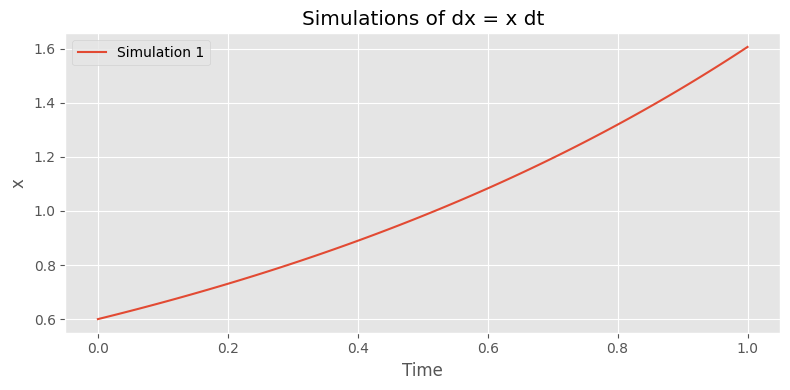

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# パラメータの設定
a = 1  # 定数 a
dt = 0.01  # 時間刻み幅
T = 1.0  # シミュレーション時間
N = int(T / dt)  # シミュレーションのステップ数

# 初期条件
x0 = 0.6  # 初期値 x(0)
t = np.linspace(0, T, N)  # 横軸の時間配列

# シミュレーションの繰り返し
num_simulations = 1  # シミュレーション回数
simulations = np.zeros((num_simulations, N))  # シミュレーション結果の配列

for i in range(num_simulations):
    x = np.zeros(N)  # xの値の配列
    x[0] = x0
    
    for j in range(N-1):
        x[j+1] = x[j] + a * x[j] * dt
    
    simulations[i] = x

# グラフのプロット
plt.figure(figsize=(8, 4))
for i in range(num_simulations):
    plt.plot(t, simulations[i], label=f'Simulation {i+1}')

plt.xlabel('Time')
plt.ylabel('x')
plt.title('Simulations of dx = x dt')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

では，ノイズ項があるとどうなるでしょうか？
$$
dx = ax \ dt + cx \ dW(t)
$$
をシミュレーションしてみましょう．

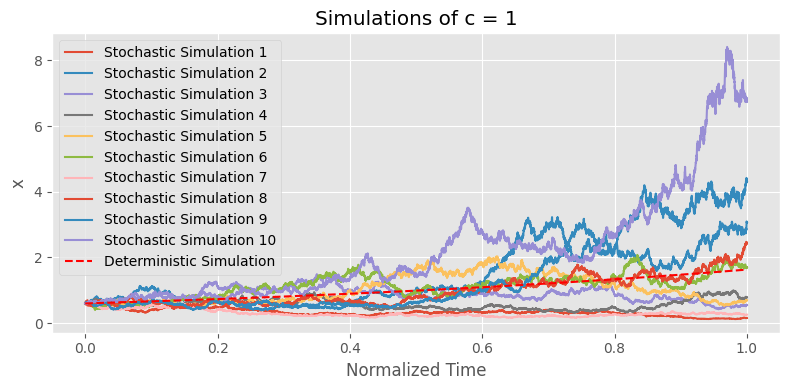

In [44]:
np.random.seed(0)
# パラメータの設定
a = 1  # 定数 a
c = 1  # 定数 c
dt = 0.0001  # 時間刻み幅
T = 1.0  # シミュレーション時間
N = int(T / dt)  # シミュレーションのステップ数

# 初期条件
x0 = 0.6  # 初期値 x(0)
t = np.linspace(0, 1, N)  # 横軸の時間配列

# シミュレーションの繰り返し
num_simulations = 10  # シミュレーション回数
simulations = np.zeros((num_simulations, N))  # シミュレーション結果の配列

for i in range(num_simulations):
    x = np.zeros(N)  # xの値の配列
    x[0] = x0
    
    for j in range(N-1):
        dW = np.random.normal(0, np.sqrt(dt))  # Wiener過程の増分
        x[j+1] = x[j] + a * x[j] * dt + c * x[j] * dW
    
    simulations[i] = x

# 先程の微分方程式のシミュレーション結果
x_deterministic = x0 * np.exp(a * t)

# グラフのプロット
plt.figure(figsize=(8, 4))
for i in range(num_simulations):
    plt.plot(t, simulations[i], label=f'Stochastic Simulation {i+1}')
plt.plot(t, x_deterministic, 'r--', label='Deterministic Simulation')

plt.xlabel('Normalized Time')
plt.ylabel('x')
plt.title('Simulations of c = 1')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

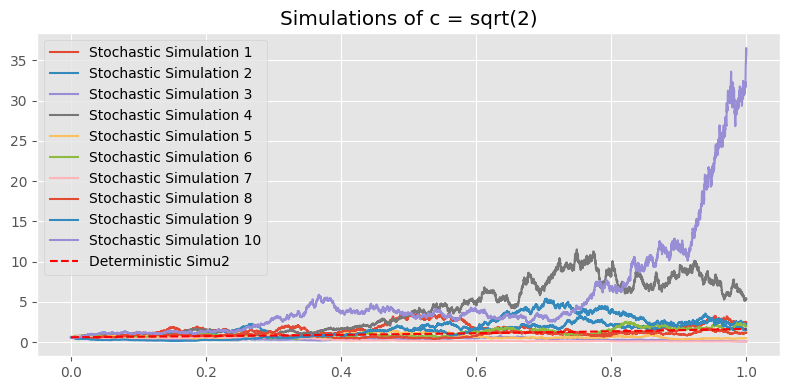

In [50]:
np.random.seed(1)
# パラメータの設定
a = 1  # 定数 a
c = np.sqrt(2)  # 定数 c
dt = 0.0001  # 時間刻み幅
T = 1.0  # シミュレーション時間
N = int(T / dt)  # シミュレーションのステップ数

# 初期条件
x0 = 0.6  # 初期値 x(0)
t = np.linspace(0, 1, N)  # 横軸の時間配列

# シミュレーションの繰り返し
num_simulations = 10  # シミュレーション回数
simulations = np.zeros((num_simulations, N))  # シミュレーション結果の配列

for i in range(num_simulations):
    x = np.zeros(N)  # xの値の配列
    x[0] = x0
    
    for j in range(N-1):
        dW = np.random.normal(0, np.sqrt(dt))  # Wiener過程の増分
        x[j+1] = x[j] + a * x[j] * dt + c * x[j] * dW
    
    simulations[i] = x

# 先程の微分方程式のシミュレーション結果
x_deterministic = x0 * np.exp(a * t)

# グラフのプロット
plt.figure(figsize=(8, 4))
for i in range(num_simulations):
    plt.plot(t, simulations[i], label=f'Stochastic Simulation {i+1}')
plt.plot(t, x_deterministic, 'r--', label='Deterministic Simu2')
plt.title('Simulations of c = sqrt(2)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

ブラック・ショールズモデルにおいて，ノイズ項を大きくすると下に潰れてしまう個数が多くなることがわかります．

対数変換したものについても眺めてみましょう．

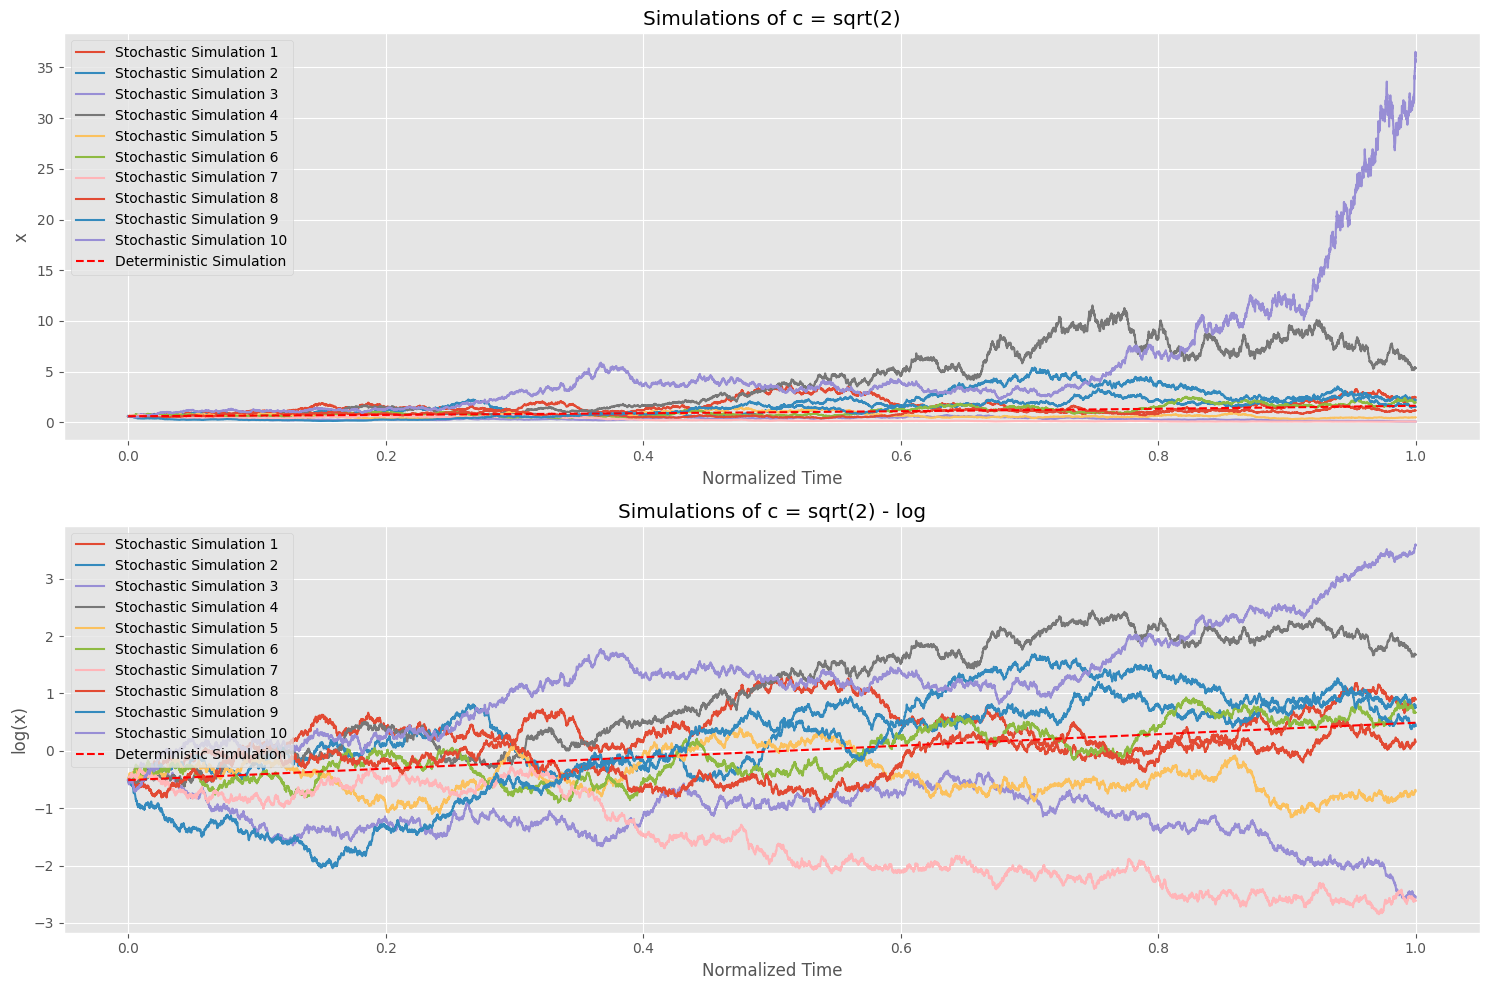

In [56]:
np.random.seed(1)
# パラメータの設定
a = 1  # 定数 a
c = np.sqrt(2)  # 定数 c
dt = 0.0001  # 時間刻み幅
T = 1.0  # シミュレーション時間
N = int(T / dt)  # シミュレーションのステップ数

# 初期条件
x0 = 0.6  # 初期値 x(0)
t = np.linspace(0, 1, N)  # 横軸の時間配列

# シミュレーションの繰り返し
num_simulations = 10  # シミュレーション回数
simulations = np.zeros((num_simulations, N))  # シミュレーション結果の配列

for i in range(num_simulations):
    x = np.zeros(N)  # xの値の配列
    x[0] = x0
    
    for j in range(N-1):
        dW = np.random.normal(0, np.sqrt(dt))  # Wiener過程の増分
        x[j+1] = x[j] + a * x[j] * dt + c * x[j] * dW
    
    simulations[i] = x

# 先程の微分方程式のシミュレーション結果
x_deterministic = x0 * np.exp(a * t)

# 対数変換
simulations_log = np.log(simulations)
x_deterministic_log = np.log(x_deterministic)

# グラフのプロット
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# シミュレーション結果のプロット
for i in range(num_simulations):
    ax1.plot(t, simulations[i], label=f'Stochastic Simulation {i+1}')
ax1.plot(t, x_deterministic, 'r--', label='Deterministic Simulation')
ax1.set_xlabel('Normalized Time')
ax1.set_ylabel('x')
ax1.set_title('Simulations of c = sqrt(2)')
ax1.legend()
ax1.grid(True)

# 対数変換した結果のプロット
for i in range(num_simulations):
    ax2.plot(t, simulations_log[i], label=f'Stochastic Simulation {i+1}')
ax2.plot(t, x_deterministic_log, 'r--', label='Deterministic Simulation')
ax2.set_xlabel('Normalized Time')
ax2.set_ylabel('log(x)')
ax2.set_title('Simulations of c = sqrt(2) - log')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# 4.5.2 Geometric Brownian Motion（幾何的ブラウン運動）
教科書にある確率微分方程式は以下のようになっている．
$$
dx = cx\ dW(t)
$$

この方程式の解
$$
x(t) = x(t_0) \exp\left\{  - \frac{c^2}{2} (t - t_0) + c[W(t) - W(t_0)] \right\}
$$

見やすくすると
$$
x(t) = x(t_0) \exp\left\{  - \frac{c^2}{2} (t - t_0)\right\}  \exp\left\{ N(0, t - t_0) \right\} 
$$

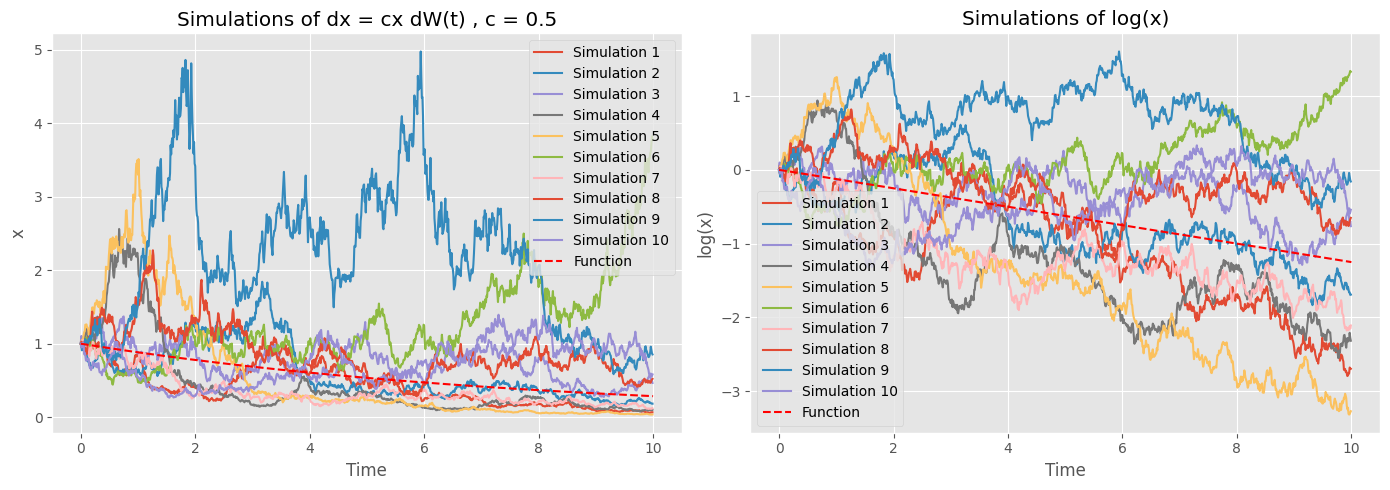

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(147)

# パラメータの設定
c = 0.5  # 定数 c
dt = 0.01  # 時間刻み幅
T = 10.0  # シミュレーション時間
N = int(T / dt)  # シミュレーションのステップ数

# 初期条件
x0 = 1.0  # 初期値 x(0)
t = np.zeros(N)  # 時間の配列

# シミュレーションの繰り返し
num_simulations = 10  # シミュレーション回数
simulations = np.zeros((num_simulations, N))  # シミュレーション結果の配列

# 通常のシミュレーション
for i in range(num_simulations):
    x = np.zeros(N)  # xの値の配列
    x[0] = x0
    
    for j in range(N-1):
        dW = np.random.normal(0, np.sqrt(dt))  # Wiener過程の増分
        x[j+1] = x[j] + c * x[j] * dW
        t[j+1] = t[j] + dt
    
    simulations[i] = x

# 対数変換したシミュレーション
log_simulations = np.log(simulations)

# 関数の定義
def func(x0, c, t0, t):
    return x0 * np.exp(-0.5 * c**2 * (t - t0))

# 関数のシミュレーション結果
t_func = np.linspace(0, T, N)
x_func = func(x0, c, 0, t_func)
log_x_func = np.log(x_func)

# グラフのプロット
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
for i in range(num_simulations):
    axs[0].plot(t, simulations[i], label=f'Simulation {i+1}')
    axs[1].plot(t, log_simulations[i], label=f'Simulation {i+1}')

# 破線で関数をプロット
axs[0].plot(t_func, x_func, 'r--', label='Function')
axs[1].plot(t_func, log_x_func, 'r--', label='Function')

axs[0].set_xlabel('Time')
axs[0].set_ylabel('x')
axs[0].set_title('Simulations of dx = cx dW(t) , c = 0.5')
axs[0].legend()
axs[0].grid(True)

axs[1].set_xlabel('Time')
axs[1].set_ylabel('log(x)')
axs[1].set_title('Simulations of log(x)')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

# 4.5.3 Complex Oscillator with Noisy Frequency（ノイズ付き複素振動子）
$$
dx = (a + bix)\ dt + c\ dW(t)
$$

# 4.5.4 Ornstein-Uhlenbeck Process（オルンシュタイン・ウーレンベック過程）
OUノイズは，調和振動子ポテンシャルに従うブラウン運動である．

チャップマン・コロモゴロフ方程式(ガーディナー3.8.4節)
$$
\frac{\partial p(x , t)}{\partial t} =  \frac{\partial (k x p(x , t))}{\partial x} +\frac{D}{2} \frac{\partial^2 p(x , t)}{\partial x^2}
$$

確率微分方程式(ガーディナー4.5.4節)
$$
dx = -kx\ dt+ \sqrt{D}\ dW(t)
$$

積分方程式(ガーディナー4.5.4節)
$$
x(t) = x(t_0) \exp{\{-k(t - t_0)\}} + \sqrt{D} \int_0^t \exp{\{-k(t-s)\}} dW(s)
$$

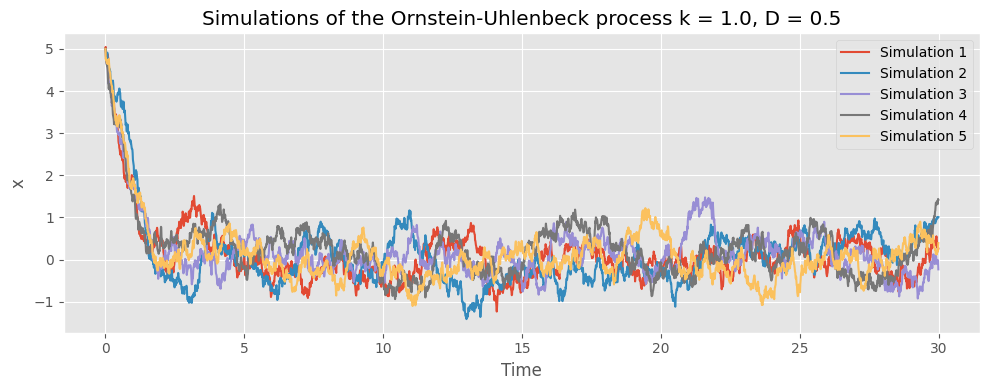

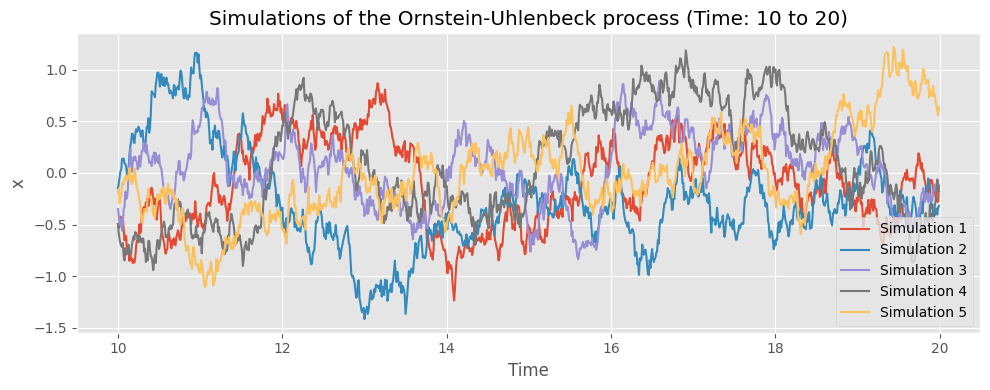

In [5]:
np.random.seed(147)
# パラメータの設定
k = 1.0  # 定数 k
D = 0.5  # ノイズの強度 D
dt = 0.01  # 時間刻み幅
T = 30.0  # シミュレーション時間
N = int(T / dt)  # シミュレーションのステップ数

# 初期条件
x0 = 5.0  # 初期値 x(0)
t = np.zeros(N)  # 時間の配列

# シミュレーションの繰り返し
num_simulations = 5  # シミュレーション回数
simulations = np.zeros((num_simulations, N))  # シミュレーション結果の配列

for i in range(num_simulations):
    x = np.zeros(N)  # xの値の配列
    x[0] = x0
    
    for j in range(N-1):
        dW = np.random.normal(0, np.sqrt(dt))  # Wiener過程の増分
        x[j+1] = x[j] - k * x[j] * dt + np.sqrt(D) * dW
        t[j+1] = t[j] + dt
    
    simulations[i] = x

# 元の0から観測時間までのプロット
plt.figure(figsize=(10, 4))
for i in range(num_simulations):
    plt.plot(t, simulations[i], label=f'Simulation {i+1}')
plt.xlabel('Time')
plt.ylabel('x')
plt.title('Simulations of the Ornstein-Uhlenbeck process k = 1.0, D = 0.5')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 時間範囲の指定
t_start = 10.0
t_end = 20.0
start_index = int(t_start / dt)
end_index = int(t_end / dt)

# 時間指定したプロット
plt.figure(figsize=(10, 4))
for i in range(num_simulations):
    plt.plot(t[start_index:end_index], simulations[i, start_index:end_index], label=f'Simulation {i+1}')
plt.xlabel('Time')
plt.ylabel('x')
plt.title('Simulations of the Ornstein-Uhlenbeck process (Time: 10 to 20)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


理論的な期待値
$$
E[x(t)] = x_0 \exp{\{-kt\}}
$$

理論的な分散
$$
Var[x(t)] = \frac{D}{2k} (1 - \exp{\{-2kt\}})
$$

定常状態

OUノイズの定常分布は，以下のようになる．
$$
p_s(x) = \sqrt{ \frac{k}{\pi D} } \exp{\left( - \frac{ k x^2}{D} \right)}
$$

また，定常自己相関関数は以下のようになる．
$$
C_s(\tau) = \frac{D}{2k} \exp{\{-k|\tau|\}}
$$

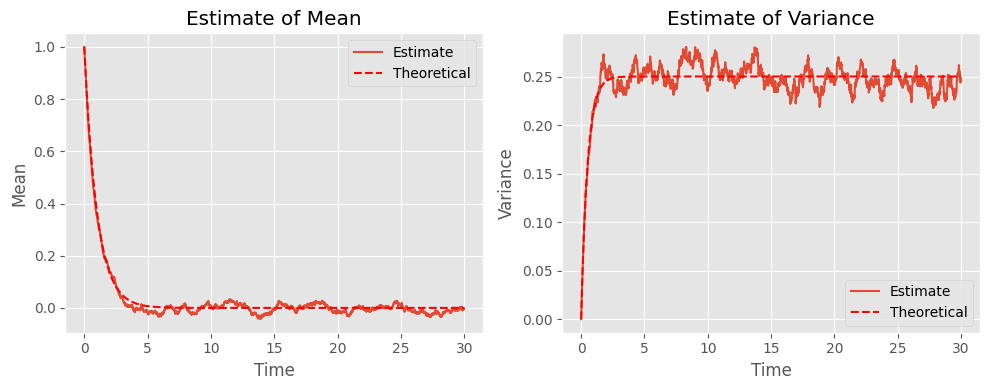

In [68]:
# パラメータの設定
k = 1.0  # ボルツマン定数 k
D = 0.5  # 熱浴の温度定数 D
dt = 0.01  # 時間刻み幅
T = 30.0  # シミュレーション時間
N = int(T / dt)  # シミュレーションのステップ数

# 初期条件
x0 = 1.0  # 初期値 x(0)
t = np.zeros(N)  # 時間の配列

# シミュレーションの繰り返し
num_simulations = 1000  # シミュレーション回数
simulations = np.zeros((num_simulations, N))  # シミュレーション結果の配列

for i in range(num_simulations):
    x = np.zeros(N)  # xの値の配列
    x[0] = x0
    
    for j in range(N-1):
        dW = np.random.normal(0, np.sqrt(dt))  # Wiener過程の増分
        x[j+1] = x[j] - k * x[j] * dt + np.sqrt(D) * dW
        t[j+1] = t[j] + dt
    
    simulations[i] = x

# 期待値と分散の推定値の計算
mean_estimates = np.mean(simulations, axis=0)
variance_estimates = np.var(simulations, axis=0)

# 理論的な期待値と分散の計算
x_theoretical = x0 * np.exp(-k * t)
mean_theoretical = x0 * np.exp(-k * t)
variance_theoretical = (D / (2 * k)) * (1 - np.exp(-2 * k * t))

# グラフのプロット
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(t, mean_estimates, label='Estimate')
plt.plot(t, mean_theoretical, 'r--', label='Theoretical')
plt.xlabel('Time')
plt.ylabel('Mean')
plt.title('Estimate of Mean')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t, variance_estimates, label='Estimate')
plt.plot(t, variance_theoretical, 'r--', label='Theoretical')
plt.xlabel('Time')
plt.ylabel('Variance')
plt.title('Estimate of Variance')
plt.legend()

plt.tight_layout()
plt.show()

# 4.5.5Conversion from Cartesian to Polar Coordinates
$$
dE_1(t) = -\gamma E_1(t)dt +  \epsilon dW_1(t)
$$
$$
dE_2(t) = -\gamma E_2(t)dt +  \epsilon dW_2(t)
$$

# 4.5.7 The General Single Variable Linear Equation
確率微分方程式
$$
dx = [b(t)\ dt + g(t)\ dW(t)]x
$$

解
$$
x(t) = x(t_0) \exp{\left\{ \int_{t_0}^t ( b(s) - \frac{1}{2}g^2(s) ) ds + \int_{t_0}^t g(s) dW(s) \right\}}
$$

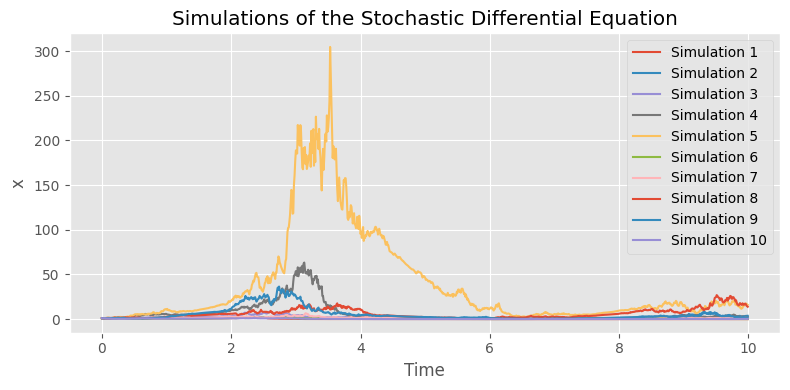

In [70]:
np.random.seed(147)

# パラメータの設定
T = 10.0  # シミュレーション時間
dt = 0.01  # 時間刻み幅
N = int(T / dt)  # シミュレーションのステップ数

# 初期条件
x0 = 1.0  # 初期値 x(0)
t = np.zeros(N)  # 時間の配列

# パラメータ関数の定義
def b(t):
    return np.sin(t)  # b(t)の定義

def g(t):
    return np.cos(t)  # g(t)の定義

# シミュレーションの繰り返し
num_simulations = 10  # シミュレーション回数
simulations = np.zeros((num_simulations, N))  # シミュレーション結果の配列

for i in range(num_simulations):
    x = np.zeros(N)  # xの値の配列
    x[0] = x0
    
    for j in range(N-1):
        dW = np.random.normal(0, np.sqrt(dt))  # Wiener過程の増分
        x[j+1] = x[j] + (b(t[j]) * dt + g(t[j]) * dW) * x[j]
        t[j+1] = t[j] + dt
    
    simulations[i] = x

# グラフのプロット
plt.figure(figsize=(8, 4))
for i in range(num_simulations):
    plt.plot(t, simulations[i], label=f'Simulation {i+1}')
plt.xlabel('Time')
plt.ylabel('x')
plt.title('Simulations of the Stochastic Differential Equation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()